<a href="https://colab.research.google.com/github/Sinha123456/Visualization/blob/main/fordgobike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Ford GoBike ride Data Exploration
by Neetu Sinha

# DataSet

That dataset consists of reagarding 183412 bike trip with different stations, In that data set we have 16 columns.
bike rider rent different types of bike with their interest, and they start their trip with certain date/time and station/longitute/letitude. After certain minutes/ hour riding rented bike and then they stopped in certain bike station.
Sometimes bikehshare.com in bayarea also provide a certain discount, for those who are under-privileged. In the dataset we have a coloumn  	bike_share_for_all_trip, that column is related about that kind of discount.

For more information about it you can read it in here https://www.bikeshareforall.org/ride

bike ride share data is prvided by the Udacity, but you can also get that from 
https://www.bikeshare.com/data/

 That website is provided data  for analysis of different stats, you can choose your favorite state for bike ride share analysis.


# Preliminary Wrangling

Ford go bike data set set is untidy data, need to make it tidy.
We have some missing values, member_birth_year column is not consistent

In [2]:
#importing packages throughout use for that analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
fordgobike = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/udacity_projects/201902-fordgobike-tripdata.csv')
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:

print(fordgobike.shape)
print(fordgobike.columns)
print(fordgobike.describe())

(183412, 16)
Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')
        duration_sec  start_station_id  ...        bike_id  member_birth_year
count  183412.000000     183215.000000  ...  183412.000000      175147.000000
mean      726.078435        138.590427  ...    4472.906375        1984.806437
std      1794.389780        111.778864  ...    1664.383394          10.116689
min        61.000000          3.000000  ...      11.000000        1878.000000
25%       325.000000         47.000000  ...    3777.000000        1980.000000
50%       514.000000        104.000000  ...    4958.000000        1987.000000
75%       796.000000        239.000000  ...    5502.000000        1992

What is the structure of your dataset?

(183412, 16)

What is/are the main feature(s) of interest in your dataset?

most interesting feature is duration of seconds, how long users ride their bike, and user type, user type can tell you how often people rent bikes or they have a monthly subscription or weekly.

What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Other interesting features are  start_time, end_time, stations, longitute, latitue, member_gender.
Do users like certain station to start and end their trip?
Which longitue and latitue they prefer to ride bike?
Which time and date are they available for bike trip? Do they use bike as a transportation or for fun?
Is more male rent bikes than female?


In [5]:
#information of the dataset.
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
fordgobike.duplicated().sum()

0

In [7]:
fordgobike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#getting more info abot the dataset through sample
fordgobike.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
86859,1146,2019-02-17 11:28:20.0620,2019-02-17 11:47:26.5140,126.0,Esprit Park,37.761634,-122.390648,11.0,Davis St at Jackson St,37.797280,-122.398436,1771,Subscriber,1991.0,Male,No
18498,193,2019-02-26 18:31:06.2710,2019-02-26 18:34:19.6960,162.0,Franklin St at 9th St,37.800516,-122.272080,339.0,Jackson St at 11th St,37.800002,-122.266438,6262,Subscriber,1983.0,Male,No
182036,897,2019-02-01 08:32:00.8600,2019-02-01 08:46:58.1640,89.0,Division St at Potrero Ave,37.769218,-122.407646,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,48,Customer,1982.0,Male,No
56069,247,2019-02-21 09:24:09.1560,2019-02-21 09:28:17.1320,175.0,49th St at Telegraph Ave,37.835946,-122.262366,176.0,MacArthur BART Station,37.828410,-122.266315,2557,Subscriber,1981.0,Male,No
126081,2079,2019-02-10 20:46:12.1740,2019-02-10 21:20:51.8160,267.0,Derby St at College Ave,37.861804,-122.253569,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,4668,Subscriber,1998.0,Male,No
158649,552,2019-02-05 18:46:45.5660,2019-02-05 18:55:58.1560,313.0,Almaden Blvd at San Fernando St,37.331415,-121.893200,277.0,Morrison Ave at Julian St,37.333658,-121.908586,1855,Subscriber,1991.0,Male,No
183352,191,2019-02-01 01:50:31.5750,2019-02-01 01:53:42.9370,81.0,Berry St at 4th St,37.775880,-122.393170,364.0,China Basin St at 3rd St,37.772000,-122.389970,5411,Subscriber,1985.0,Male,No
92343,393,2019-02-15 19:12:30.7140,2019-02-15 19:19:03.7810,182.0,19th Street BART Station,37.809013,-122.268247,196.0,Grand Ave at Perkins St,37.808894,-122.256460,588,Subscriber,1989.0,Male,Yes
13414,816,2019-02-27 16:04:43.8130,2019-02-27 16:18:20.6810,259.0,Addison St at Fourth St,37.866249,-122.299371,151.0,53rd St at Hollis St,37.836182,-122.287180,4640,Subscriber,1977.0,Female,Yes
4327,454,2019-02-28 16:06:37.1530,2019-02-28 16:14:11.8000,90.0,Townsend St at 7th St,37.771058,-122.402717,27.0,Beale St at Harrison St,37.788059,-122.391865,5537,Subscriber,1987.0,Male,No


In [9]:
#checking null values in the dataset
fordgobike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

Lots of data is missing from member_birth_year and member_gender, we also have missing data from stations.

In [10]:
fordgobike.duration_sec.value_counts()

272      311
324      292
323      291
306      291
305      290
        ... 
5803       1
11870      1
5931       1
15964      1
5058       1
Name: duration_sec, Length: 4752, dtype: int64

In [11]:
fordgobike.duration_sec.describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

In [12]:
#converting duration_sec in minutes
def convert_min(x, inverse = False):
  if not inverse:
    return x/60
  else:
    return x%60
fordgobike['duration_min'] = fordgobike['duration_sec'].apply(convert_min)
fordgobike.duration_min.describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_min, dtype: float64

## Univariate Plot

In [13]:
#selecting all objects column from the dataset
obj_cols = fordgobike.select_dtypes(include= ['object']).columns
obj_cols

Index(['start_time', 'end_time', 'start_station_name', 'end_station_name',
       'user_type', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

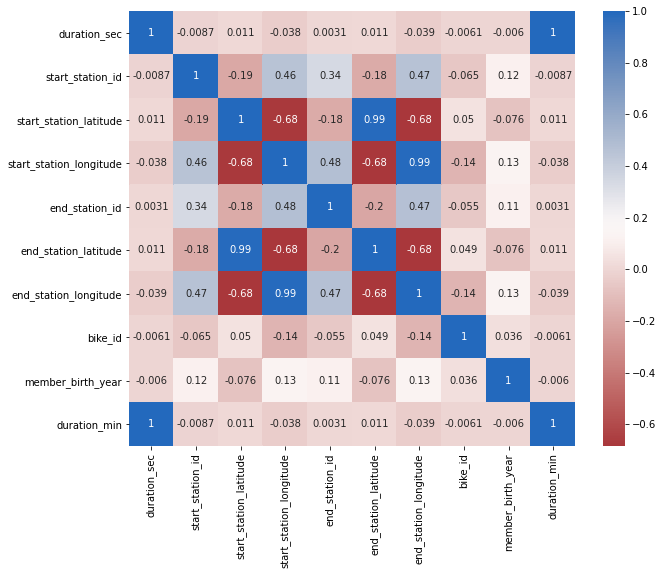

In [14]:
#selecting all numeric columns from the dataset and correlation plot
plt.figure(figsize=[10,8])
num_cols = fordgobike.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(fordgobike[num_cols].corr(), annot=True, cmap='vlag_r')

plt.show()

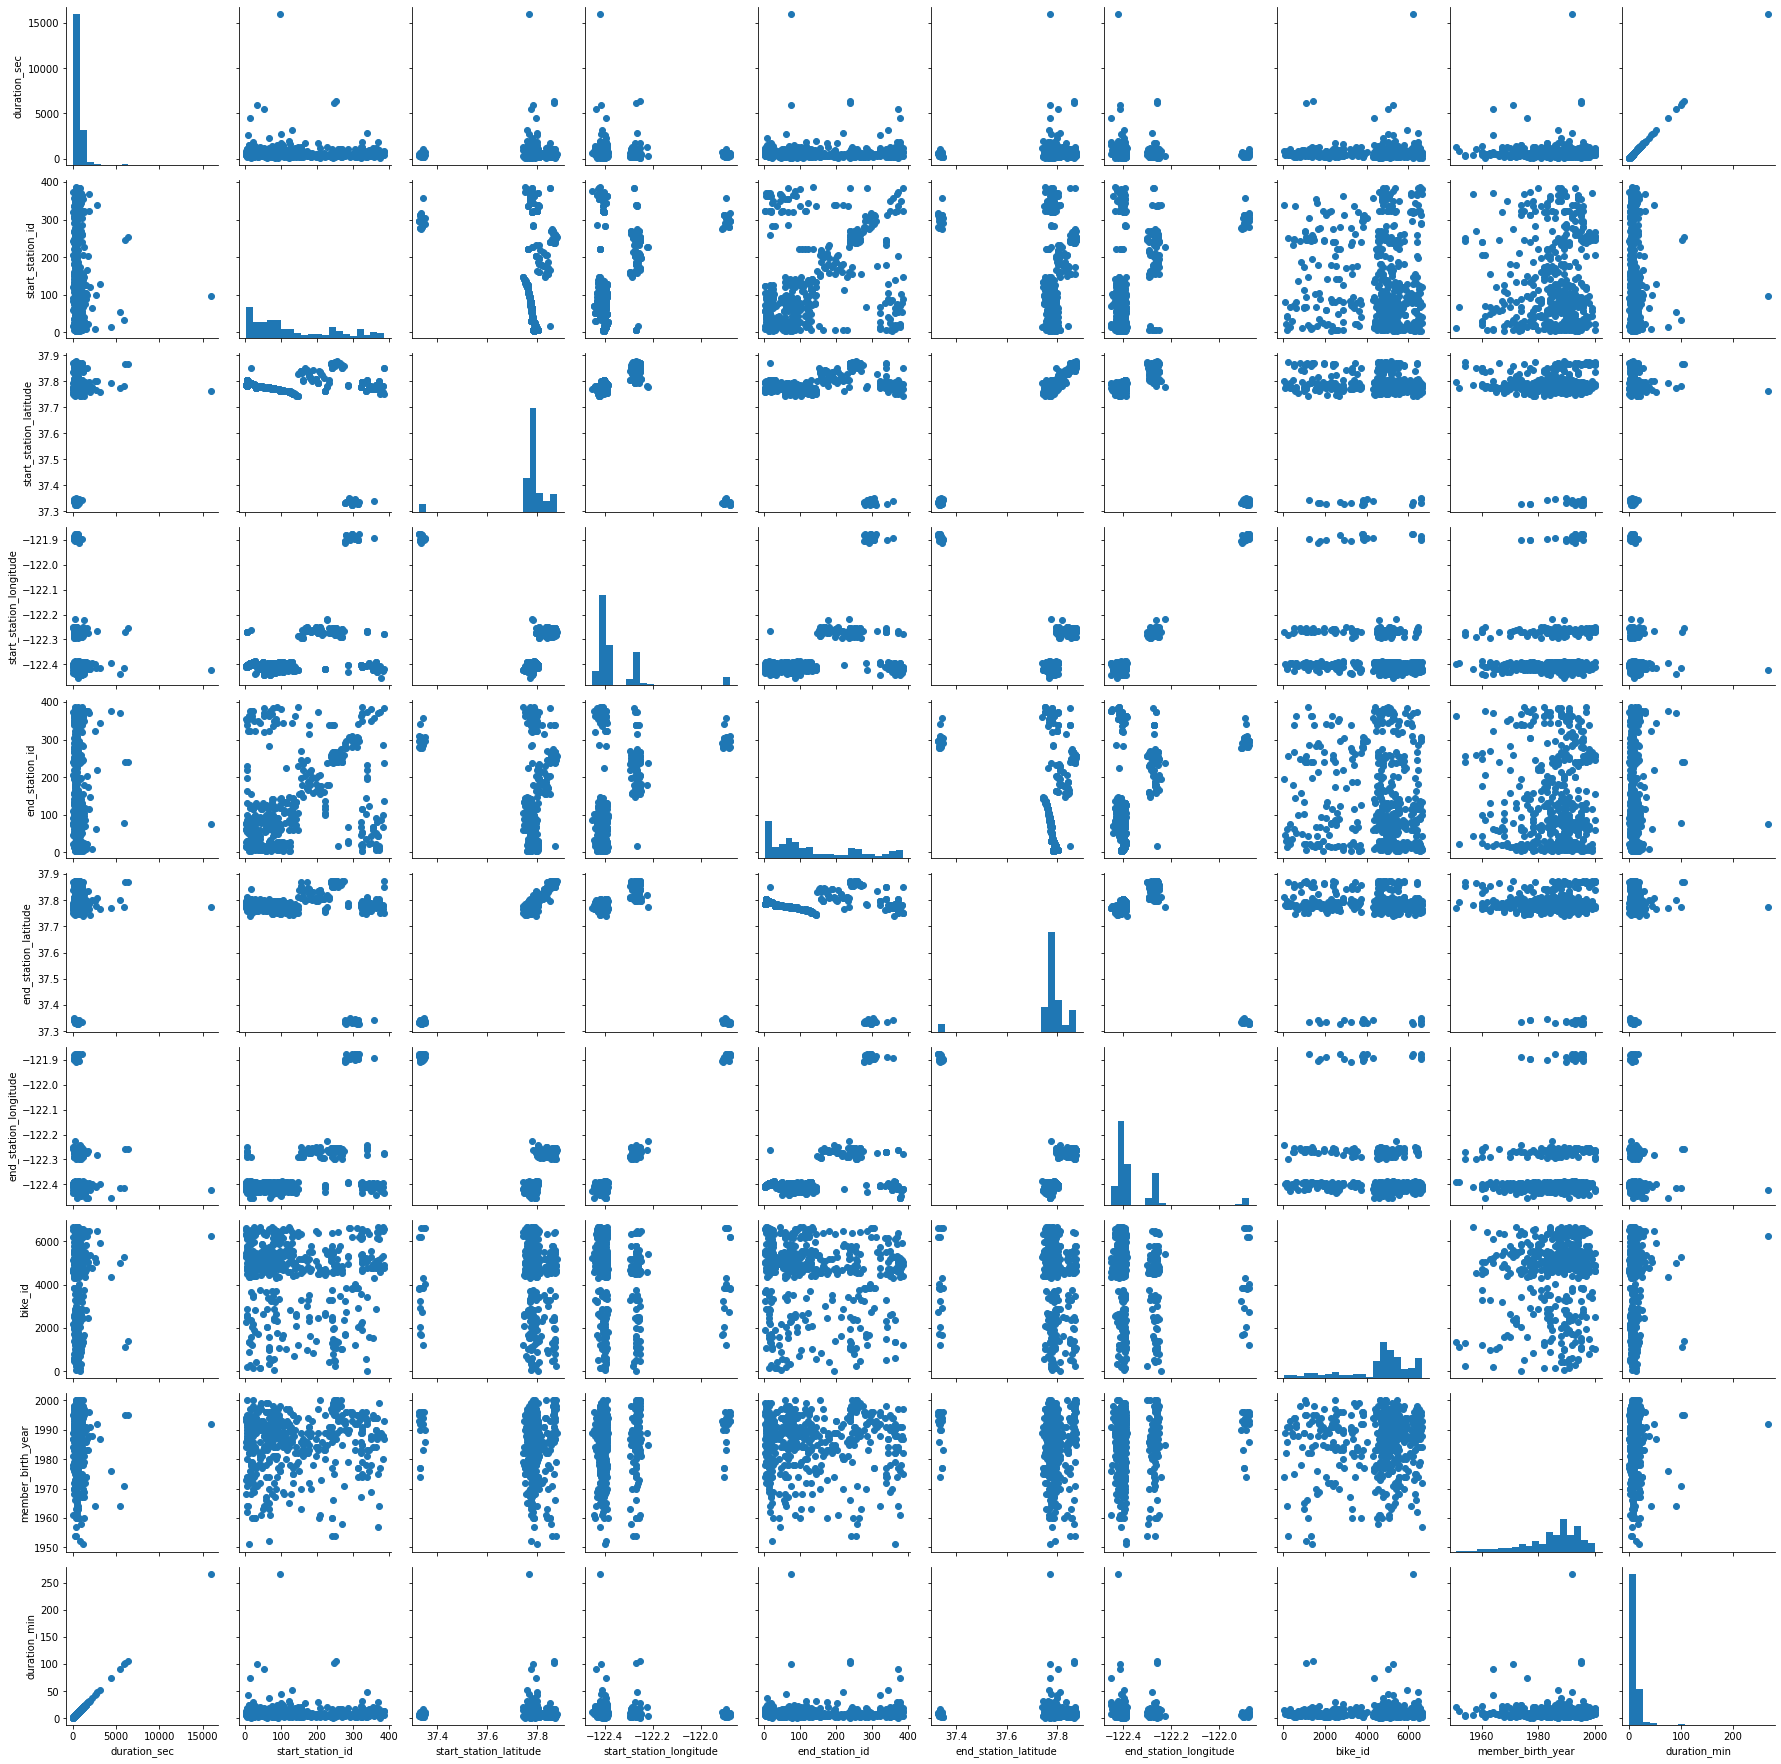

In [15]:
#plot matrix
sample = np.random.choice(fordgobike.shape[0], 500, replace=False)
fordgobike_samp = fordgobike.loc[sample,:]
g = sns.PairGrid(data=fordgobike_samp, vars=num_cols)
g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)
plt.show()

Data has a lots of outliers, as from the heatmap plot and matrix plot,
Start_station_latitude, and end_station_latitude are positivly correlated, start_station_id and end_station_latitue are positive moderate correlated, start_station_longitude and start_station_latitude are negative correlated, same as negative correlation between longitude/latitude in end station, duration_sec is negatively correlated with start_station_id, bike_id, and birth_year, but slightly positive correlation between start_station_id, end_station_id, and end_station_latitude, other variables are not so important for the analysis. Duration time should be correlated with other variables but we can see there is slightly positive and negative correlation with other variables, we need further investiagation about that variable.

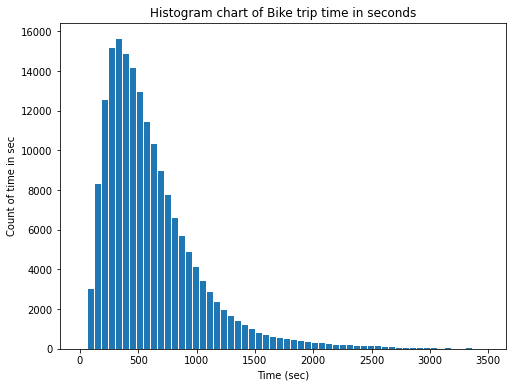

In [16]:
#bike trip Time plot in seconds
plt.figure(figsize=[8,6])
bins = np.arange(0,fordgobike['duration_sec'].quantile(0.99) + 60,  60)
plt.hist('duration_sec', data = fordgobike, bins = bins, edgecolor = 'white')
plt.xlabel('Time (sec)')
plt.ylabel('Count of time in sec')
plt.title('Histogram chart of Bike trip time in seconds')
plt.show()

The hist plot is right skewed in time duration in seconds of bike trip, maximum bike trip time is between 300-400 seconds, higher time is very less in the plot, need to be more investigation.

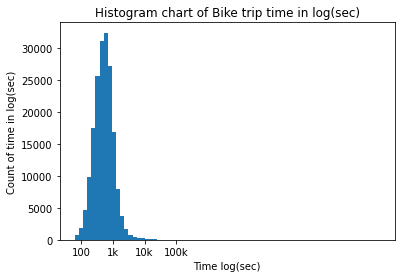

In [17]:
#hist plot using log of duration sec, transforming time to log
log_binsize = 0.13
bins = 10**np.arange(1.8, np.log(fordgobike['duration_sec'].max()) +log_binsize, log_binsize)
plt.hist('duration_sec', data = fordgobike, bins = bins)
plt.xscale('log')
plt.xticks([100, 1e3, 1e4, 1e5], ['100', '1k', '10k', '100k'])
plt.xlabel('Time log(sec)')
plt.ylabel('Count of time in log(sec)')
plt.title('Histogram chart of Bike trip time in log(sec)')
plt.show()

Using log scale in duration_sec variable, we got interesting plot, there is a peak in 1k seconds.

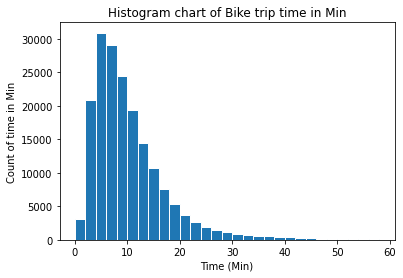

In [18]:
#bike trip Time plot in minutes
bins = np.arange(0, fordgobike['duration_min'].quantile(0.99) + 2, 2)
plt.hist('duration_min', data = fordgobike, bins = bins, edgecolor = 'white')
plt.xlabel('Time (Min)')
plt.ylabel('Count of time in Min')
plt.title('Histogram chart of Bike trip time in Min')
plt.show()


Hist plot in converting time to minutes plot is right skew. In this plot we measure bins in quantile distribution, Plot is not linear.

In [19]:
fordgobike.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


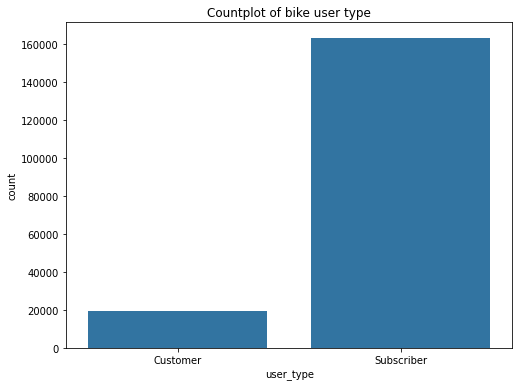

In [20]:
plt.figure(figsize=(8,6))
base_color = sns.color_palette()[0]
sns.countplot('user_type', data = fordgobike, color = base_color)
plt.title('Countplot of bike user type')
plt.show()

The count plot of user type, we can see there are more subscribers than customers, bike users have annual subscriptions of their bikes, we can say people in bayarea they use ford bikes a lot not only for fun they use as a transportation too.

In [21]:
fordgobike.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


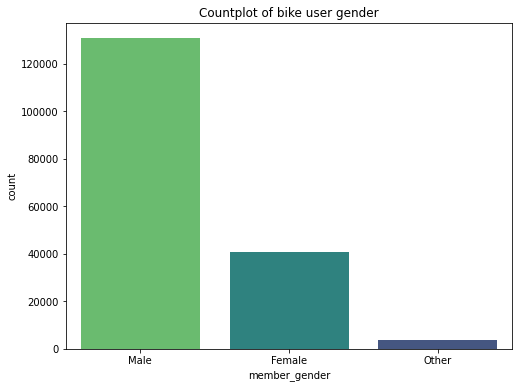

In [22]:
plt.figure(figsize=(8,6))
order = ['Male', 'Female', 'Other']
sns.countplot('member_gender', data = fordgobike, color = base_color, order=order, palette='viridis_r')
plt.title('Countplot of bike user gender')
plt.show()

There are more male than female users are in the bike trip plan. There are few belong to others, I assume that these others are not registered as a male or female, I searched about the gender type other than male and female and, I found that there are 7 unique genders(female, male, intersex, trans, non-conforming, personal, and eunuch)

## Bivariate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


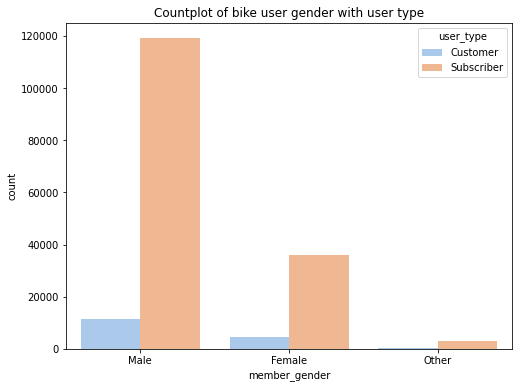

In [23]:
plt.figure(figsize=(8,6))
order = ['Male', 'Female', 'Other']
sns.countplot('member_gender', data = fordgobike, color = base_color, hue='user_type', order=order, palette='pastel')
plt.title('Countplot of bike user gender with user type')
plt.show()

Number of males are higher than female as well as subscription too in bike trip.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


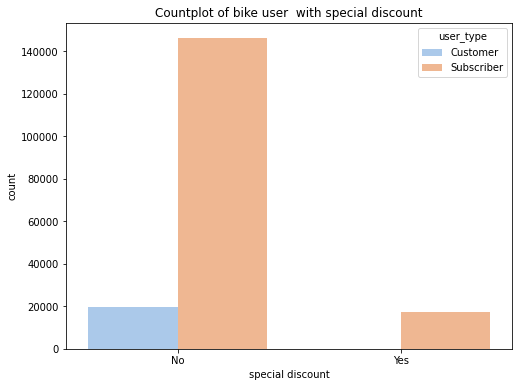

In [24]:
plt.figure(figsize=(8,6))
sns.countplot('bike_share_for_all_trip', data = fordgobike, color = base_color, hue='user_type', palette='pastel')
plt.title('Countplot of bike user  with special discount')
plt.xlabel('special discount')
plt.show()

Very few subsciber got special plan for annual membership, but customers didn't get special offer, those who fullfill requirement of annual membership of bike trip, got special discount.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


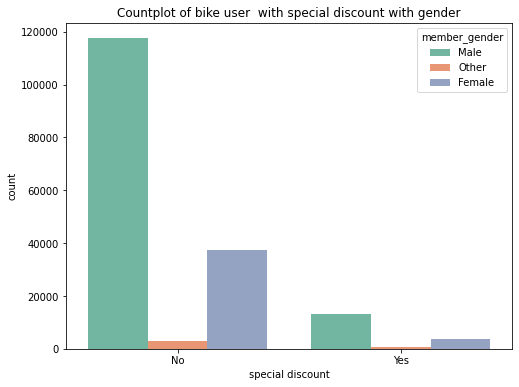

In [25]:
plt.figure(figsize=(8,6))
sns.countplot('bike_share_for_all_trip', data = fordgobike, color = base_color, hue='member_gender', palette='Set2')
plt.title('Countplot of bike user  with special discount with gender')
plt.xlabel('special discount')
plt.show()

All genders got equally discount.

## Wrangling

In [26]:
fordgobike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
duration_min                  0
dtype: int64

In [27]:
#making copy of original dataset
fordgobike_copy = fordgobike.copy()

In [28]:
#dropping na values from the member_birth_year
fordgobike_copy = fordgobike_copy.dropna(subset=['member_birth_year'])

In [29]:
#converting float to int birth_year, it is already in float but was getting error so I converted first float and then int.
fordgobike_copy['member_birth_year'] = fordgobike_copy['member_birth_year'].astype(float).astype(int)


In [30]:
#check the converted column name 
fordgobike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             175147 non-null  int64  
 1   start_time               175147 non-null  object 
 2   end_time                 175147 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   175147 non-null  float64
 6   start_station_longitude  175147 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     175147 non-null  float64
 10  end_station_longitude    175147 non-null  float64
 11  bike_id                  175147 non-null  int64  
 12  user_type                175147 non-null  object 
 13  member_birth_year        175147 non-null  int64  
 14  memb

In [31]:
#converting start_time and end_time columns to date time column
def convert_time(x):
  var_time = pd.to_datetime(x)
  return var_time
fordgobike_copy['start_time'] = fordgobike_copy['start_time'].apply(convert_time)
fordgobike_copy['end_time'] = fordgobike_copy['end_time'].apply(convert_time)

In [32]:
#check time column converted to date time.
fordgobike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   175147 non-null  float64       
 6   start_station_longitude  175147 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     175147 non-null  float64       
 10  end_station_longitude    175147 non-null  float64       
 11  bike_id                  175147 non-null  int64         
 12  user_type       

In [33]:
fordgobike_copy.start_station_id.value_counts(), fordgobike_copy.end_station_id.value_counts()

(58.0     3649
 67.0     3408
 81.0     2952
 21.0     2711
 3.0      2620
          ... 
 234.0       9
 51.0        7
 224.0       4
 300.0       3
 344.0       2
 Name: start_station_id, Length: 329, dtype: int64, 67.0     4624
 58.0     3709
 21.0     3461
 15.0     3151
 30.0     2870
          ... 
 51.0        9
 300.0       7
 344.0       6
 224.0       5
 301.0       5
 Name: end_station_id, Length: 329, dtype: int64)

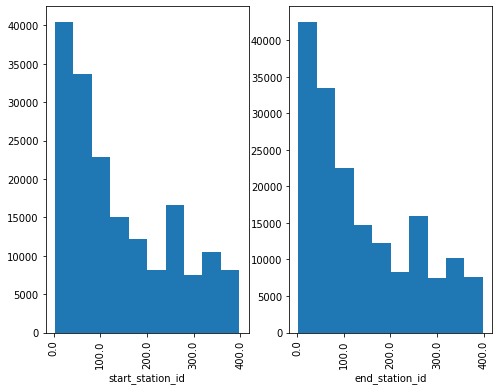

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[8,6])
bin_x = np.arange(min(fordgobike_copy.start_station_id), max(fordgobike_copy.start_station_id), 2)
bin_y = np.arange(min(fordgobike_copy.end_station_id), max(fordgobike_copy.end_station_id))

ax[0].hist(x = 'start_station_id', data = fordgobike_copy)
ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 90)  
ax[0].set_xlabel('start_station_id')

ax[1].hist(x = 'end_station_id', data = fordgobike_copy)
ax[1].set_xlabel('end_station_id')
ax[1].set_xticklabels(ax[1].get_xticks(), rotation = 90)  
plt.show()

We can see start station id and end station id plot is identical, users rented bike in the same station id and returen it back or stopped in the same bike station.

In [35]:
#check member birt year values entries.
fordgobike_copy.query('member_birth_year <= 1878 or member_birth_year <= 1945')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
1073,303,2019-02-28 19:49:38.120,2019-02-28 19:54:42.044,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,76.0,McCoppin St at Valencia St,37.771662,-122.422423,6333,Subscriber,1945,Male,Yes,5.050000
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900,Male,Yes,2.466667
2085,694,2019-02-28 18:21:05.187,2019-02-28 18:32:39.596,107.0,17th St at Dolores St,37.763015,-122.426497,89.0,Division St at Potrero Ave,37.769218,-122.407646,385,Subscriber,1941,Male,No,11.566667
2366,191,2019-02-28 18:14:07.503,2019-02-28 18:17:18.808,76.0,McCoppin St at Valencia St,37.771662,-122.422423,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,6558,Subscriber,1945,Male,Yes,3.183333
2484,3458,2019-02-28 17:13:50.585,2019-02-28 18:11:28.806,98.0,Valencia St at 16th St,37.765052,-122.421866,76.0,McCoppin St at Valencia St,37.771662,-122.422423,6558,Subscriber,1945,Male,Yes,57.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180728,362,2019-02-01 10:13:44.871,2019-02-01 10:19:47.762,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,27.0,Beale St at Harrison St,37.788059,-122.391865,4877,Subscriber,1942,Male,No,6.033333
181019,494,2019-02-01 09:38:06.311,2019-02-01 09:46:21.165,27.0,Beale St at Harrison St,37.788059,-122.391865,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,5474,Subscriber,1942,Male,No,8.233333
182830,428,2019-02-01 07:45:05.934,2019-02-01 07:52:14.922,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5031,Subscriber,1901,Male,No,7.133333
183385,400,2019-02-01 00:46:47.276,2019-02-01 00:53:27.596,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,337.0,Webster St at 19th St,37.806970,-122.266588,3487,Subscriber,1945,Male,Yes,6.666667


In [36]:
#get the birth year until users who are in 70's
fordgobike_copy = fordgobike_copy.loc[fordgobike_copy['member_birth_year'] >= 1945]

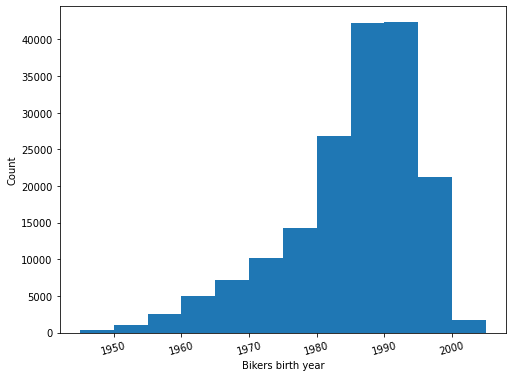

In [37]:
plt.figure(figsize = [8,6])
bins = np.arange(min(fordgobike_copy.member_birth_year), max(fordgobike_copy.member_birth_year)+5, 5)
plt.hist(data = fordgobike_copy, x = 'member_birth_year', bins = bins)
plt.xticks(rotation=15)
plt.xlabel('Bikers birth year')
plt.ylabel('Count')
plt.show()

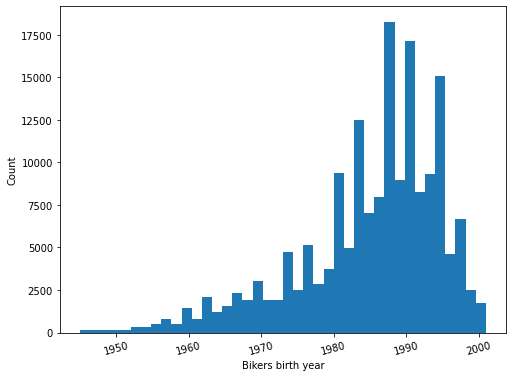

In [38]:
#changing bins in the birth year plot
plt.figure(figsize = [8,6])
plt.hist(data = fordgobike_copy, x = 'member_birth_year', bins = 40)
plt.xticks(rotation=15)
plt.xlabel('Bikers birth year')
plt.ylabel('Count')
plt.show()

Users birth year plot is right skew, adults do not use bike as much as youngers use bike trip.

We need to melt some columns and make our data tidy

In [39]:
fordgobike_copy.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'duration_min'],
      dtype='object')

Text(0.5, 1.0, 'Scatter plot of longitude and latitude of bike trip')

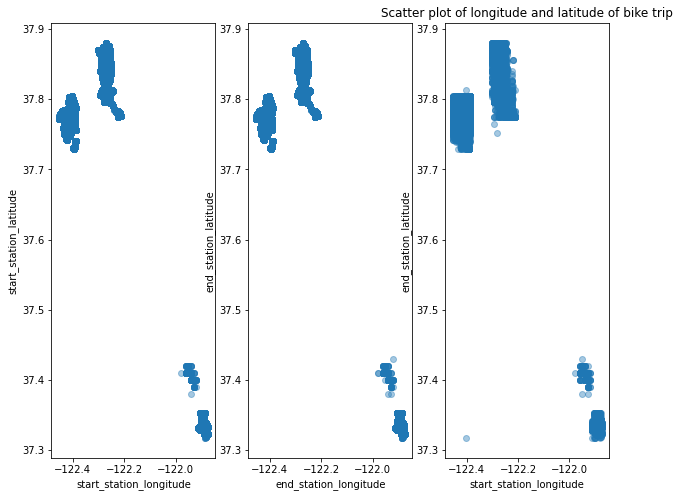

In [40]:
plt.figure(figsize=[10,8])
plt.subplot(1,3,1)
plt.scatter(data= fordgobike_copy, x = 'start_station_longitude', y = 'start_station_latitude', alpha=0.4)
plt.xlabel('start_station_longitude')
plt.ylabel('start_station_latitude')

plt.subplot(1,3,2)
plt.scatter(data= fordgobike_copy, x = 'end_station_longitude', y = 'end_station_latitude', alpha=0.4)
plt.xlabel('end_station_longitude')
plt.ylabel('end_station_latitude')

plt.subplot(1,3,3)
plt.scatter(data= fordgobike_copy, x = 'start_station_longitude', y = 'end_station_latitude', alpha=0.4)
plt.xlabel('start_station_longitude')
plt.ylabel('end_station_latitude')
plt.title('Scatter plot of longitude and latitude of bike trip')

Bike users, start their bike trip in the same longitue and latitude and trip is end in the same as longitude and latitude as well.

In [41]:
#Calculate the distance between latitude and longitude
def haversine_np(lon1, lat1, lon2, lat2):
  """
  calculate the greate circle distance between two points
  on the earth (specified in decimal degrees)
  all args must be of equal length
  """
  lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
  c = 2 * np.arcsin(np.sqrt(a))
  km = 6367 * c    # 6367 is the radius of eart in km
  return km

In [42]:
fordgobike_copy['distance'] = haversine_np(fordgobike_copy['start_station_longitude'], fordgobike_copy['start_station_latitude'], fordgobike_copy['end_station_longitude'], fordgobike_copy['end_station_latitude'])
fordgobike_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.750000,0.544367
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030.900000,2.702847
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.166667,0.260575
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.416667,2.407789
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,29.883333,3.330111


In [43]:
fordgobike_copy.duration_min.describe()

count    174882.000000
mean         11.741978
std          27.378195
min           1.016667
25%           5.383333
50%           8.516667
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

Text(0, 0.5, 'distance')

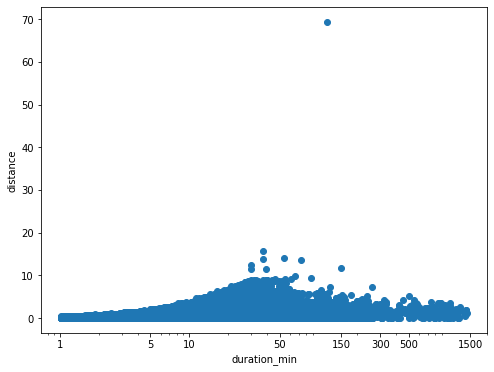

In [44]:
plt.figure(figsize = [8,6])
plt.scatter(y = 'distance', x = 'duration_min', data = fordgobike_copy)
plt.xscale('log')
ticks = [1, 5, 10, 50, 150, 300, 500, 1500]
plt.xticks(ticks = ticks, labels=ticks)
plt.xlabel('duration_min')
plt.ylabel('distance')


In [45]:
fordgobike_copy.isna().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           195
start_station_name         195
start_station_latitude       0
start_station_longitude      0
end_station_id             195
end_station_name           195
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
duration_min                 0
distance                     0
dtype: int64

In [55]:
#removing null values from the id's column and station_name column
fordgobike_copy = fordgobike_copy.dropna(subset = ['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name'])
fordgobike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174687 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174687 non-null  int64         
 1   start_time               174687 non-null  datetime64[ns]
 2   end_time                 174687 non-null  datetime64[ns]
 3   start_station_id         174687 non-null  float64       
 4   start_station_name       174687 non-null  object        
 5   start_station_latitude   174687 non-null  float64       
 6   start_station_longitude  174687 non-null  float64       
 7   end_station_id           174687 non-null  float64       
 8   end_station_name         174687 non-null  object        
 9   end_station_latitude     174687 non-null  float64       
 10  end_station_longitude    174687 non-null  float64       
 11  bike_id                  174687 non-null  int64         
 12  user_type       

In [56]:
#converting id's to object columns
cols = ['start_station_id', 'end_station_id']
for i in cols:
  fordgobike_copy[i] = fordgobike_copy[i].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [58]:
fordgobike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174687 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174687 non-null  int64         
 1   start_time               174687 non-null  datetime64[ns]
 2   end_time                 174687 non-null  datetime64[ns]
 3   start_station_id         174687 non-null  object        
 4   start_station_name       174687 non-null  object        
 5   start_station_latitude   174687 non-null  float64       
 6   start_station_longitude  174687 non-null  float64       
 7   end_station_id           174687 non-null  object        
 8   end_station_name         174687 non-null  object        
 9   end_station_latitude     174687 non-null  float64       
 10  end_station_longitude    174687 non-null  float64       
 11  bike_id                  174687 non-null  int64         
 12  user_type       

In [59]:
#extract time from the start_time column
fordgobike_copy['timeS'] = fordgobike_copy.start_time.dt.time
fordgobike_copy['timeS']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         17:32:10.145000
2         12:13:13.218000
3         17:54:26.010000
4         23:54:18.549000
5         23:49:58.632000
               ...       
183407    00:04:49.724000
183408    00:05:34.744000
183409    00:06:05.549000
183410    00:05:34.360000
183411    00:00:20.636000
Name: timeS, Length: 174687, dtype: object

In [60]:
#extract day from the start_time and end_time 
fordgobike_copy['start_day'] = fordgobike_copy['start_time'].dt.strftime('%A')
fordgobike_copy.start_day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         Thursday
2         Thursday
3         Thursday
4         Thursday
5         Thursday
            ...   
183407      Friday
183408      Friday
183409      Friday
183410      Friday
183411      Friday
Name: start_day, Length: 174687, dtype: object

In [61]:
#extract time from the end_time column
fordgobike_copy['timeE'] = fordgobike_copy['end_time'].dt.time
fordgobike_copy['timeE']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         08:01:55.975000
2         05:24:08.146000
3         04:02:36.842000
4         00:20:44.074000
5         00:19:51.760000
               ...       
183407    00:12:50.034000
183408    00:10:48.502000
183409    00:08:27.220000
183410    00:07:54.287000
183411    00:04:52.058000
Name: timeE, Length: 174687, dtype: object

In [62]:
#extracting day from the end_ime column
fordgobike_copy['end_day'] = fordgobike_copy['end_time'].dt.strftime('%A')
fordgobike_copy.end_day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         Friday
2         Friday
3         Friday
4         Friday
5         Friday
           ...  
183407    Friday
183408    Friday
183409    Friday
183410    Friday
183411    Friday
Name: end_day, Length: 174687, dtype: object

In [74]:
#droppin cloumn start_time and end_time
fordgobike_copy.drop(['start_time', 'end_time'], axis = 1, inplace=True)
fordgobike_copy.head(1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,distance,timeS,start_day,timeE,end_day
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.75,0.544367,17:32:10.145000,Thursday,08:01:55.975000,Friday


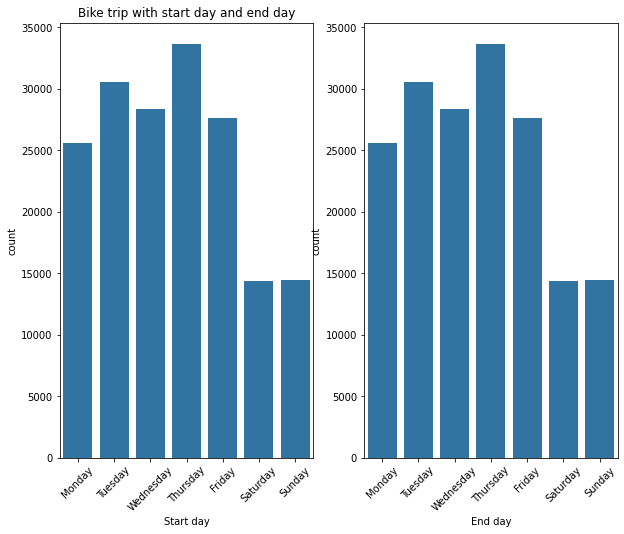

In [69]:
plt.figure(figsize=[10,8])
plt.title('Bike trip with start day and end day')
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.subplot(1,2,1)
sns.countplot(x= 'start_day', data=fordgobike_copy, order = order, color = base_color )
plt.xlabel('Start day')
plt.xticks(rotation = 45)
plt.title('Countplot of bike trip with start day and end day')
plt.subplot(1,2,2)
sns.countplot(x= 'start_day', data=fordgobike_copy, order = order, color = base_color )
plt.xlabel('End day')
plt.xticks(rotation = 45)
plt.show()

We can see both countplot, start_day and end_day,  higher bike trip was start on Thursday and end was on higher on Thursday as well. It ws surprising that bike trip were more less on weekends than weekdays

We can see start and end latitude falling around 37, we also found these values throug programming assess, same as start and end longitude values fall -121-122. We can say that bike users used these latitude/longitude for their bike trip.S

In [ ]:
fordgobike_type1.shape

In [ ]:
# 
  